In [1]:
import matplotlib
#matplotlib.use('Agg') # necessary for linux kernal
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd

from keras import models
from keras.models import load_model
from keras.layers import Input
from keras.models import Model

from mapgenlib.eval import readImg, rescaleImg, model_predict, save_prediction

def update_gan_generator_to_any_size(old_model):
    # Remove the top layer and add input with no limit
    old_model.layers.pop(0) 
    newInput = Input(shape=(None, None, 1)) # New image input
    newOutputs = old_model(newInput)
    newModel = Model(newInput, newOutputs)
    return newModel

def predict_long_image(SavedModel, testPath, fn_input, out_path, scale, nr, overlap = 160):

    image_arr = readImg(testPath + fn_input)
    collect = np.zeros(image_arr.shape)

    for i in range(int(image_arr.shape[1] / 2000)):

        img_range = [0,4000,2000 * i - overlap,2000 * (i+1) + overlap]
        img_insert = [0,4000,2000 * i,2000 * (i+1)]

        if len(img_range) == 4: # If range was set
            xmin, xmax, ymin, ymax = img_range

            if ymin < 0:
                ymin = 0

            if ymax > image_arr.shape[1]:
                ymax = image_arr.shape[1]

            print(xmin, xmax, ymin, ymax)

            image_sub = image_arr[xmin:xmax, ymin:ymax]

            image_sub = rescaleImg(image_sub)

            xmin_, xmax_, ymin_, ymax_ = img_insert

            print(ymin_-ymin, ymax- ymax_)

            pred_sub = model_predict(SavedModel, image_sub, num_runs = nr)

            #if i%2==1:
            #    pred_sub = np.logical_not(pred_sub)

            a,b = ymin_-ymin, ymin_-ymin + 2000 + ymax -ymax

            collect[xmin_:xmax_, ymin_:ymax_] = pred_sub[:, a:b]
    
    save_prediction(collect, out_path, fn_input[:-4], '_' + str(scale) + '_' + str(nr) + '_out.png')

ImportError: No module named 'keras'

In [2]:
if 1: # Final Residual U-net with l2 loss and Adam 0.0004
    

    #scale = 25
    #modelPath = '../tmp_data/predictions/2019-02-28 11-05-31_25/' 
    #out_evaluation = r"../tmp_data/Evaluations/Runet_25k/"
    
    #scale = 15
    #modelPath = '../tmp_data/predictions/2019-02-26 12-55-00_15/' 
    #out_evaluation = r"../tmp_data/Evaluations/Runet_15k/"
    
    scale = 10
    modelPath = '../tmp_data/predictions/U128_2019-03-10 12-26-47_10/'
    out_evaluation = r"../tmp_data/Evaluations/Runet_10k/"
    
    modelname = "weights.h5"
    saved_model = load_model(modelPath + modelname)
    saved_model = update_gan_generator_to_any_size(saved_model)

In [3]:
tester_path = '../tmp_data/building/' 
fn = r"big_hameln_label_50cm.tif"

0 4000 0 2160
0 160
0 4000 1840 4160
160 160
0 4000 3840 6160
160 160
0 4000 5840 8160
160 160
0 4000 7840 10160
160 160
0 4000 9840 12000
160 0


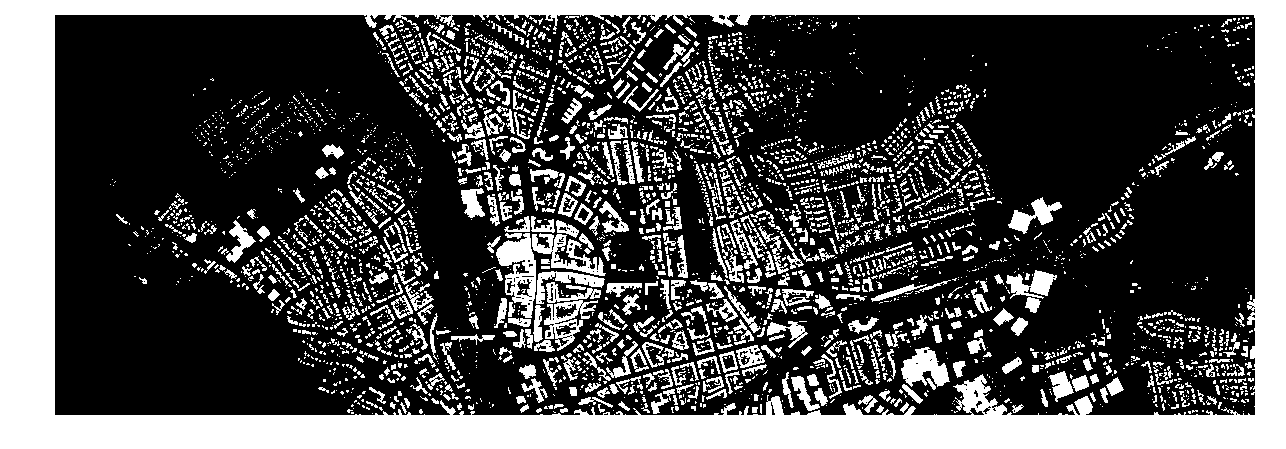

In [4]:
predict_long_image(saved_model,tester_path, fn, out_evaluation, scale, nr = 1)

0 4000 0 2160
0 160
0 4000 1840 4160
160 160
0 4000 3840 6160
160 160
0 4000 5840 8160
160 160
0 4000 7840 10160
160 160
0 4000 9840 12000
160 0


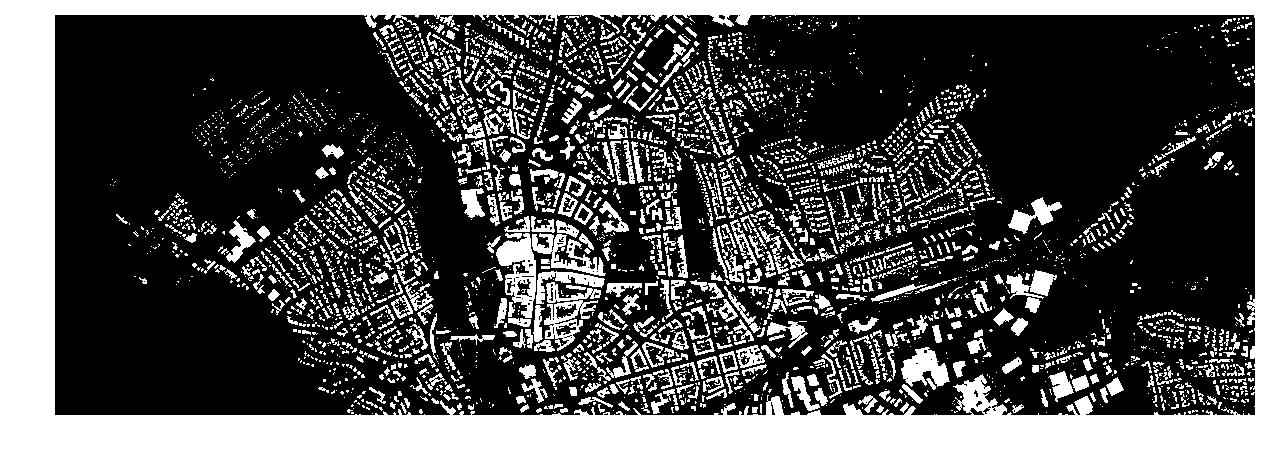

In [5]:
predict_long_image(saved_model,tester_path, fn, out_evaluation, scale, nr = 2)